* [Direct linear least squares fitting of an ellipse](https://scipython.com/blog/direct-linear-least-squares-fitting-of-an-ellipse/)
* [Ellipse Fitting](http://www.users.on.net/~zygmunt.szpak/ellipsefitting.html)
* [bdhammel/least-squares-ellipse-fitting: Fitting an Ellipse using a Least Squares method, in Python](https://github.com/bdhammel/least-squares-ellipse-fitting)

In [2]:
import numpy as np

In [21]:
npts = 4
tmin, tmax = np.pi/6, 4 * np.pi/3
x0, y0 = 4, -3.5
ap, bp = 7, 3
phi = np.pi / 4
# Get some points on the ellipse (no need to specify the eccentricity).
x, y = get_ellipse_pts((x0, y0, ap, bp, None, phi), npts, tmin, tmax)
noise = 0.1
x += noise * np.random.normal(size=npts) 
y += noise * np.random.normal(size=npts)

In [22]:
def get_ellipse_pts(params, npts=100, tmin=0, tmax=2*np.pi):
    """
    Return npts points on the ellipse described by the params = x0, y0, ap,
    bp, e, phi for values of the parametric variable t between tmin and tmax.

    """

    x0, y0, ap, bp, e, phi = params
    # A grid of the parametric variable, t.
    t = np.linspace(tmin, tmax, npts)
    x = x0 + ap * np.cos(t) * np.cos(phi) - bp * np.sin(t) * np.sin(phi)
    y = y0 + ap * np.cos(t) * np.sin(phi) + bp * np.sin(t) * np.cos(phi)
    return x, y

In [360]:
x,y = get_ellipse_pts((0,0,2,1,None,0), npts=6, tmin=np.pi/6, tmax=np.pi/6+2*np.pi)

In [361]:
x = np.resize(x, x.size -1)
y = np.resize(y, y.size -1)

In [362]:
np.array((x,y)).T

array([[ 1.73205081,  0.5       ],
       [-0.41582338,  0.9781476 ],
       [-1.98904379,  0.10452846],
       [-0.81347329, -0.91354546],
       [ 1.48628965, -0.66913061]])

In [363]:
D1=np.vstack([x**2, x*y, y**2]).T
D1

array([[ 3.        ,  0.8660254 ,  0.25      ],
       [ 0.17290908, -0.40673664,  0.95677273],
       [ 3.9562952 , -0.20791169,  0.0109262 ],
       [ 0.66173879,  0.74314483,  0.8345653 ],
       [ 2.20905693, -0.9945219 ,  0.44773577]])

In [364]:
D2=np.vstack([x,y,np.ones(len(x))]).T
D2

array([[ 1.73205081,  0.5       ,  1.        ],
       [-0.41582338,  0.9781476 ,  1.        ],
       [-1.98904379,  0.10452846,  1.        ],
       [-0.81347329, -0.91354546,  1.        ],
       [ 1.48628965, -0.66913061,  1.        ]])

In [365]:
S1=D1.T @ D1
S1

array([[ 3.00000000e+01, -1.34754935e-15,  2.50000000e+00],
       [-1.34754935e-15,  2.50000000e+00,  4.47301448e-16],
       [ 2.50000000e+00,  4.47301448e-16,  1.87500000e+00]])

In [366]:
S2 = D1.T@D2
S2

array([[ 2.82937389e-15,  1.05833698e-15,  1.00000000e+01],
       [ 1.15593483e-15,  2.09467978e-17, -1.11022302e-16],
       [ 1.58236484e-17,  8.72599320e-17,  2.50000000e+00]])

In [367]:
S3 = D2.T @ D2
S3

array([[ 1.00000000e+01, -1.51566865e-16,  8.88178420e-16],
       [-1.51566865e-16,  2.50000000e+00,  2.22044605e-16],
       [ 8.88178420e-16,  2.22044605e-16,  5.00000000e+00]])

In [368]:
T = -np.linalg.inv(S3) @ S2.T
T

array([[-1.05301705e-16, -1.15593483e-16,  4.28265561e-17],
       [-2.45699108e-16, -8.37871914e-18,  9.50494817e-18],
       [-2.00000000e+00,  2.22044605e-17, -5.00000000e-01]])

In [369]:
M = S1 + S2@T
C = np.array(((0, 0, 2), (0, -1, 0), (2, 0, 0)), dtype=float)

In [370]:
M = np.linalg.inv(C)@M

In [371]:
M

array([[-1.25000000e+00,  2.51406300e-16,  3.12500000e-01],
       [ 1.12550475e-15, -2.50000000e+00, -5.02812600e-16],
       [ 5.00000000e+00, -5.62752373e-16, -1.25000000e+00]])

In [372]:
eigval, eigvec = np.linalg.eig(M)
eigval, eigvec

(array([-2.50000000e+00, -2.77555756e-16, -2.50000000e+00]),
 array([[-2.42535625e-01,  2.42535625e-01, -7.09701641e-02],
        [ 2.15414908e-16,  2.15414908e-16, -9.56229580e-01],
        [ 9.70142500e-01,  9.70142500e-01,  2.83880656e-01]]))

In [373]:
con = 4 * eigvec[0]* eigvec[2] - eigvec[1]**2
ak = eigvec[:, np.nonzero(con > 0)[0]]
con, ak

(array([-0.94117647,  0.94117647, -0.99496324]),
 array([[2.42535625e-01],
        [2.15414908e-16],
        [9.70142500e-01]]))

In [374]:
coeffs = np.concatenate((ak, T @ ak)).ravel()
coeffs

array([ 2.42535625e-01,  2.15414908e-16,  9.70142500e-01,  1.60084474e-17,
       -5.03696324e-17, -9.70142500e-01])

In [375]:
cart_to_pol(coeffs)

(-3.300225983504183e-17,
 2.5959914359471492e-17,
 2.0,
 0.9999999999999999,
 0.8660254037844386,
 3.141592653589793)

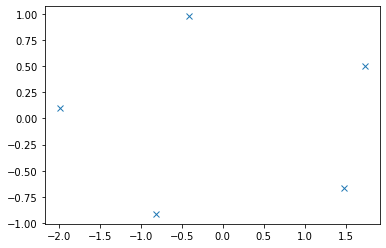

In [376]:
import matplotlib.pyplot as plt

plt.plot(x, y, 'x')     # given points
#x, y = get_ellipse_pts((x0, y0, ap, bp, None, phi))
#plt.plot(x, y)
plt.show()

In [10]:
coeffs = fit_ellipse(x, y)
coeffs

array([ 0.50620766, -0.69821746,  0.50620766, -6.49342235,  6.33632342,
       16.37756323])

In [8]:
def fit_ellipse(x, y):
    """

    Fit the coefficients a,b,c,d,e,f, representing an ellipse described by
    the formula F(x,y) = ax^2 + bxy + cy^2 + dx + ey + f = 0 to the provided
    arrays of data points x=[x1, x2, ..., xn] and y=[y1, y2, ..., yn].

    Based on the algorithm of Halir and Flusser, "Numerically stable direct
    least squares fitting of ellipses'.


    """

    D1 = np.vstack([x**2, x*y, y**2]).T
    D2 = np.vstack([x, y, np.ones(len(x))]).T
    S1 = D1.T @ D1
    S2 = D1.T @ D2
    S3 = D2.T @ D2
    T = -np.linalg.inv(S3) @ S2.T
    M = S1 + S2 @ T
    C = np.array(((0, 0, 2), (0, -1, 0), (2, 0, 0)), dtype=float)
    M = np.linalg.inv(C) @ M
    eigval, eigvec = np.linalg.eig(M)
    con = 4 * eigvec[0]* eigvec[2] - eigvec[1]**2
    ak = eigvec[:, np.nonzero(con > 0)[0]]
    return np.concatenate((ak, T @ ak)).ravel()

In [18]:
np.array((x,y)).T

array([[ 8.94974747e+00,  1.44974747e+00],
       [ 8.80523957e+00,  1.57432448e+00],
       [ 8.64138268e+00,  1.67846897e+00],
       [ 8.45883657e+00,  1.76176160e+00],
       [ 8.25833630e+00,  1.82386697e+00],
       [ 8.04068921e+00,  1.86453501e+00],
       [ 7.80677170e+00,  1.88360195e+00],
       [ 7.55752566e+00,  1.88099104e+00],
       [ 7.29395471e+00,  1.85671277e+00],
       [ 7.01712018e+00,  1.81086491e+00],
       [ 6.72813677e+00,  1.74363207e+00],
       [ 6.42816811e+00,  1.65528498e+00],
       [ 6.11842208e+00,  1.54617937e+00],
       [ 5.80014591e+00,  1.41675458e+00],
       [ 5.47462118e+00,  1.26753175e+00],
       [ 5.14315868e+00,  1.09911176e+00],
       [ 4.80709308e+00,  9.12172765e-01],
       [ 4.46777760e+00,  7.07467508e-01],
       [ 4.12657855e+00,  4.85820266e-01],
       [ 3.78486981e+00,  2.48123532e-01],
       [ 3.44402733e+00, -4.66557304e-03],
       [ 3.10542354e+00, -2.71529156e-01],
       [ 2.77042191e+00, -5.51392651e-01],
       [ 2.

In [19]:
def cart_to_pol(coeffs):
    """

    Convert the cartesian conic coefficients, (a, b, c, d, e, f), to the
    ellipse parameters, where F(x, y) = ax^2 + bxy + cy^2 + dx + ey + f = 0.
    The returned parameters are x0, y0, ap, bp, e, phi, where (x0, y0) is the
    ellipse centre; (ap, bp) are the semi-major and semi-minor axes,
    respectively; e is the eccentricity; and phi is the rotation of the semi-
    major axis from the x-axis.

    """

    # We use the formulas from https://mathworld.wolfram.com/Ellipse.html
    # which assumes a cartesian form ax^2 + 2bxy + cy^2 + 2dx + 2fy + g = 0.
    # Therefore, rename and scale b, d and f appropriately.
    a = coeffs[0]
    b = coeffs[1] / 2
    c = coeffs[2]
    d = coeffs[3] / 2
    f = coeffs[4] / 2
    g = coeffs[5]

    den = b**2 - a*c
    if den > 0:
        raise ValueError('coeffs do not represent an ellipse: b^2 - 4ac must'
                         ' be negative!')

    # The location of the ellipse centre.
    x0, y0 = (c*d - b*f) / den, (a*f - b*d) / den

    num = 2 * (a*f**2 + c*d**2 + g*b**2 - 2*b*d*f - a*c*g)
    fac = np.sqrt((a - c)**2 + 4*b**2)
    # The semi-major and semi-minor axis lengths (these are not sorted).
    ap = np.sqrt(num / den / (fac - a - c))
    bp = np.sqrt(num / den / (-fac - a - c))

    # Sort the semi-major and semi-minor axis lengths but keep track of
    # the original relative magnitudes of width and height.
    width_gt_height = True
    if ap < bp:
        width_gt_height = False
        ap, bp = bp, ap

    # The eccentricity.
    r = (bp/ap)**2
    if r > 1:
        r = 1/r
    e = np.sqrt(1 - r)

    # The angle of anticlockwise rotation of the major-axis from x-axis.
    if b == 0:
        phi = 0 if a < c else np.pi/2
    else:
        phi = np.arctan((2.*b) / (a - c)) / 2
        if a > c:
            phi += np.pi/2
    if not width_gt_height:
        # Ensure that phi is the angle to rotate to the semi-major axis.
        phi += np.pi/2
    phi = phi % np.pi

    return x0, y0, ap, bp, e, phi

In [20]:
x0, y0, ap, bp, e, phi = cart_to_pol(coeffs)
print('x0, y0, ap, bp, e, phi = ', x0, y0, ap, bp, e, phi)

x0, y0, ap, bp, e, phi =  4.000000000000017 -3.5000000000000004 7.000000000000122 2.999999999999947 0.9035079029052584 0.785398163397452
